## Problem Statement
- Use Python to calculate the slope of the regression line along with +/-1 and +/-2 times standard deviation of each name. 50 day, 150 day and 300 day accordingly.

### Solution

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

#### Import and explore data

In [2]:
# Import and explore data
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,Date,PX_LAST
0,2018-01-01,59.09
1,2018-01-02,60.36
2,2018-01-03,59.86
3,2018-01-04,60.28
4,2018-01-07,59.70


In [4]:
df.tail()

,Date,PX_LAST
704,2020-10-29,114.6
705,2020-11-01,114.0
706,2020-11-02,114.4
707,2020-11-03,112.0
708,2020-11-04,113.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     709 non-null    datetime64[ns]
 1   PX_LAST  709 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.2 KB


#### Determine variables and set to correct format for plotting and calculation


In [6]:
x_raw = df['Date']
y_raw = df['PX_LAST']

x_raw = [i.toordinal() for i in x_raw] # convert dates to numbers for plotting

#### Calculate regression for subset of data including last 'n' days.

In [7]:
def calculate_reg_for(num_days = 50):
    x = x_raw[-num_days:]
    y = y_raw[-num_days:]
    slope, intercept, *_ = stats.linregress(x, y)
    y_pred = list(map(lambda x: slope * x + intercept, x))
    return x,y,y_pred,slope

#### Plotting functions of original + regression line with variations

In [8]:
def plot_data_with_regression(x,y_orig,y_pred):
    fig, ax = plt.subplots(figsize=(10,10))
    plot_original_data(x,y_orig,ax)
    plot_regression_line(x,y_pred,ax)
    plot_regression_with_std(x,y_pred,ax)
    set_dates_on_axis(ax)
    # Add labels and title
    fig.suptitle('PX_LAST')
    ax.set_xlabel('date')
    ax.set_ylabel('price')
    plt.show()

def plot_original_data(x,y_orig,ax):
    ax.plot(x,y_orig)
    
def plot_regression_line(x,y_pred,ax):
    ax.plot(x,y_pred)
    
def plot_regression_with_std(x,y_pred,ax):
    ax.plot(x,y_pred+np.std(y_pred),'g--')
    ax.plot(x,y_pred-np.std(y_pred),'g--')
    ax.plot(x,y_pred+2*np.std(y_pred),'r--')
    ax.plot(x,y_pred-2*np.std(y_pred),'r--')
    
def set_dates_on_axis(ax):
    l = matplotlib.dates.AutoDateLocator()
    f = matplotlib.dates.AutoDateFormatter(l)
    ax.xaxis.set_major_locator(l)
    ax.xaxis.set_major_formatter(f)

#### Display regression for the last n days

Regression calculated across last 50 days
Slope of Regression Line -0.075


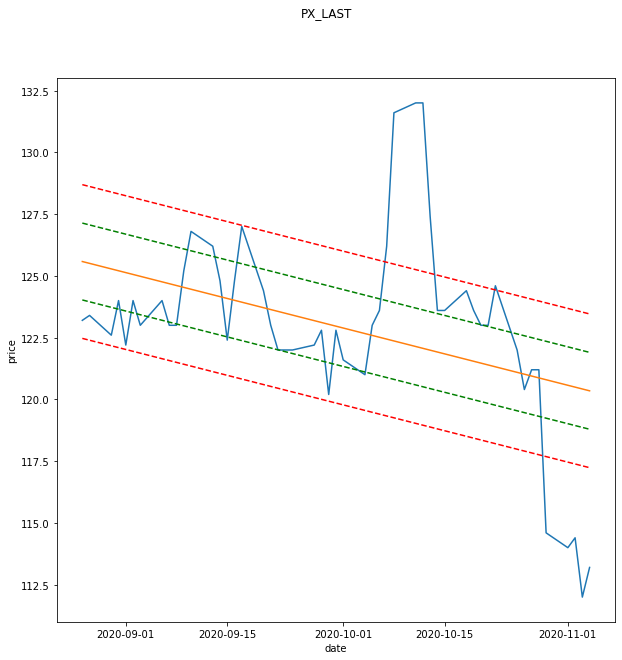

Regression calculated across last 150 days
Slope of Regression Line 0.132


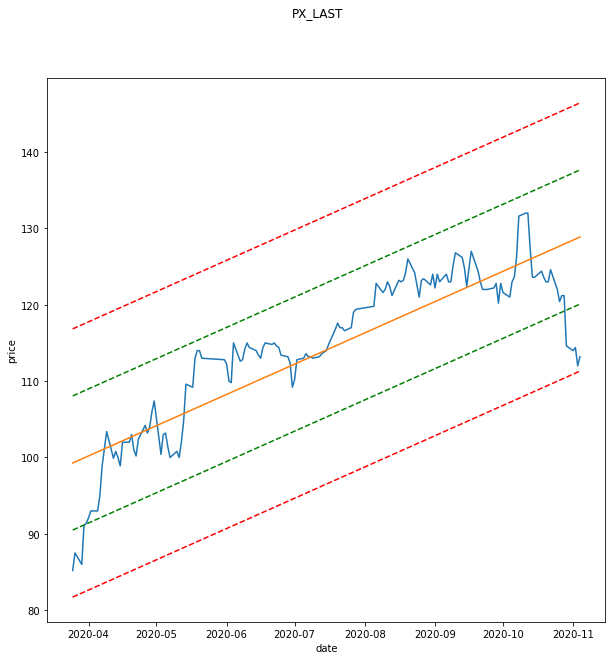

Regression calculated across last 300 days
Slope of Regression Line 0.054


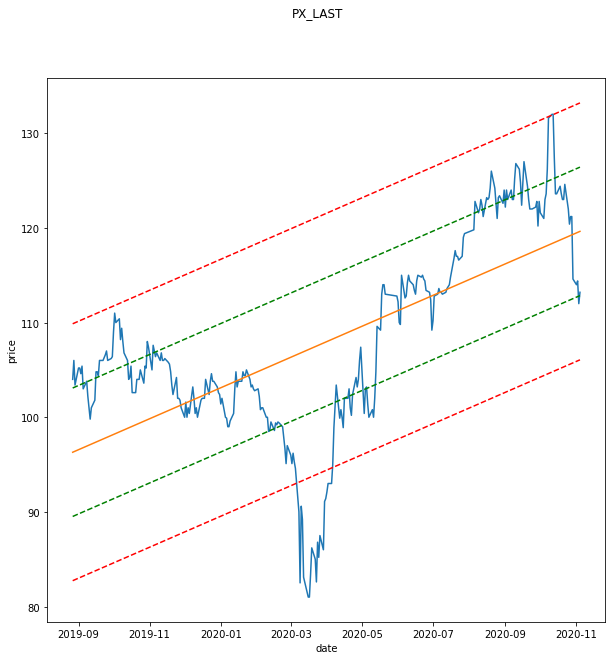

In [16]:
for num_days in [50,150,300]:
    x,y,y_pred,slope = calculate_reg_for(num_days = num_days)
    print('Regression calculated across last {} days'.format(str(num_days)))
    print('Slope of Regression Line {0:.3f}'.format(float(slope)))
    plot_data_with_regression(x,y,y_pred)